In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("insurance_claims.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.507000,0.710000,52751.940000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.500201,0.453989,26412.926671,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,0.000000,41812.500000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.000000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,1.000000,1.000000,70592.500000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,1.000000,1.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.drop('_c39',axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [17]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
Claim_type                     0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses 

In [18]:
# To print no of unique values in each columns of a dataset
unique_value = data.nunique(axis=0) 
table= pd.DataFrame()
table['Value']= unique_value            
table=table.sort_values('Value',ascending=True)
table

,Value
fraud_reported,2
police_report_available,2
witnesses,2
bodily_injuries,2
property_damage,2
insured_sex,2
Claim_type,2
policy_state,3
policy_csl,3
policy_deductable,3


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

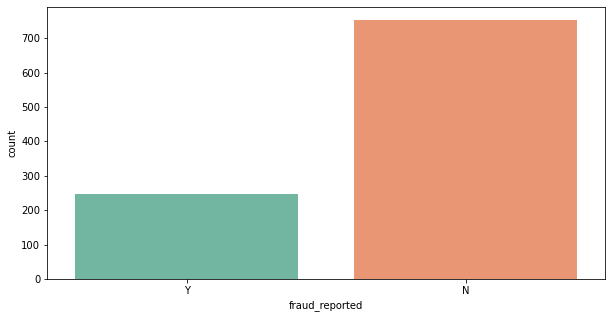

In [19]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='Claim_type', ylabel='count'>

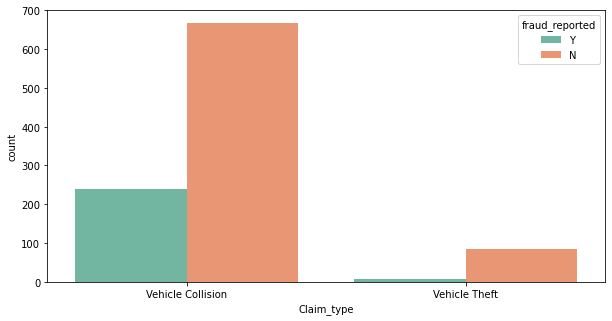

In [20]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Claim_type',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

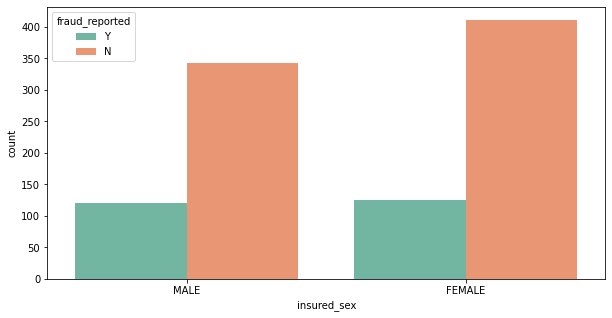

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='insured_sex',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

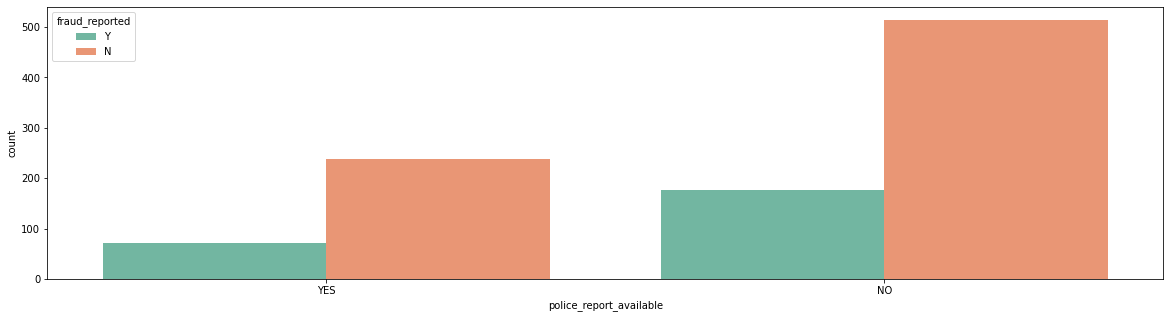

In [11]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='police_report_available',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='witnesses', ylabel='count'>

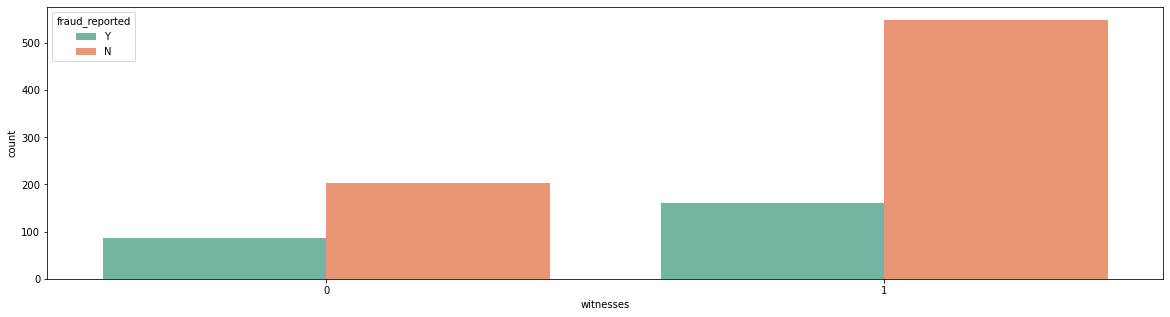

In [12]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='witnesses',hue='fraud_reported',data=data,palette='Set2')


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

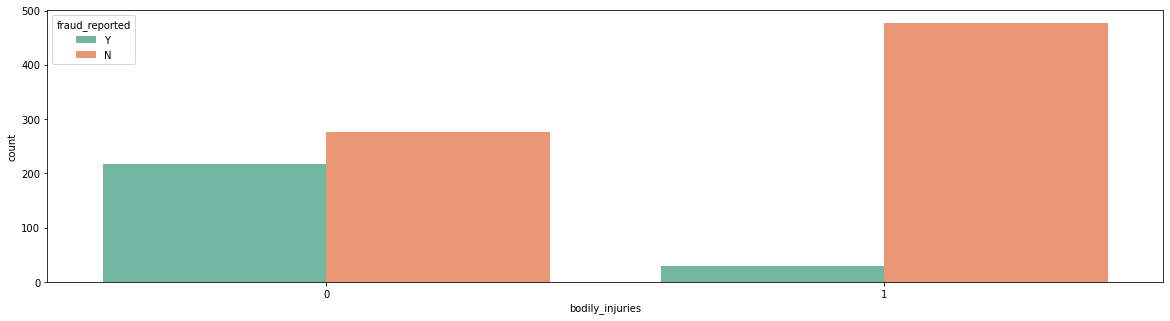

In [13]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=data,palette='Set2')


<AxesSubplot:xlabel='property_damage', ylabel='count'>

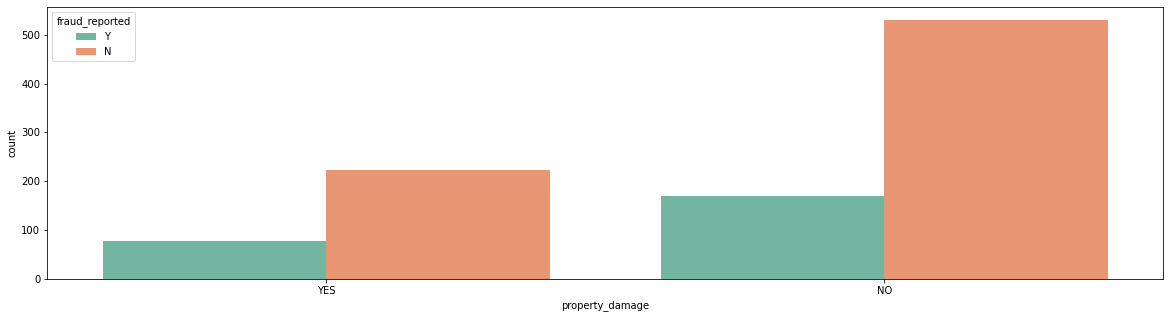

In [14]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='property_damage',hue='fraud_reported',data=data,palette='Set2')


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

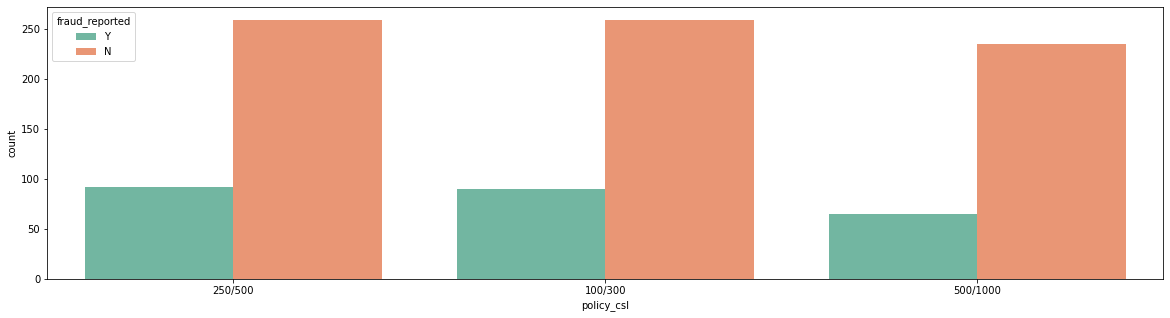

In [15]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='policy_csl',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

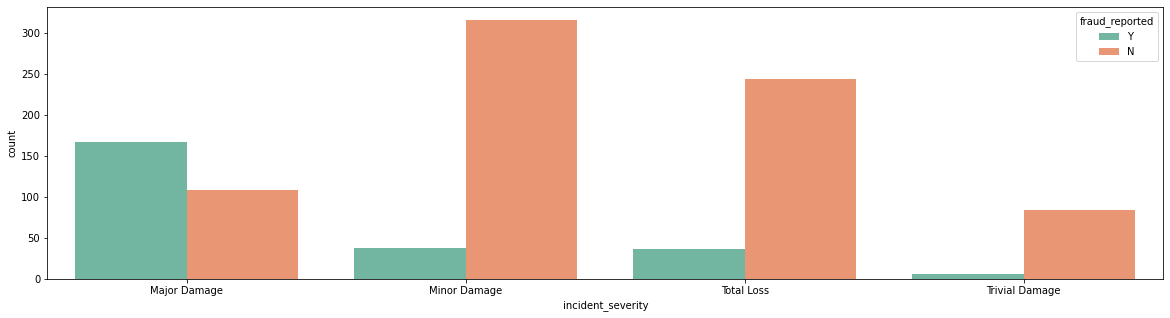

In [16]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='incident_severity',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='incident_type', ylabel='count'>

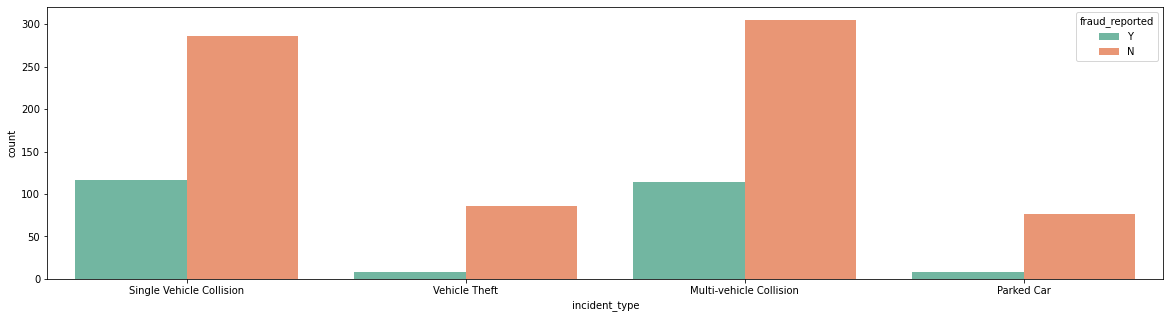

In [17]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='incident_type',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='incident_city', ylabel='count'>

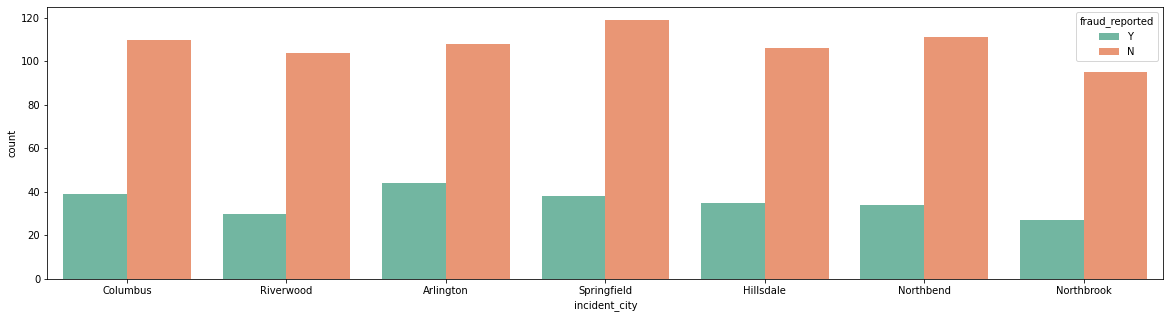

In [18]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='incident_city',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='collision_type', ylabel='count'>

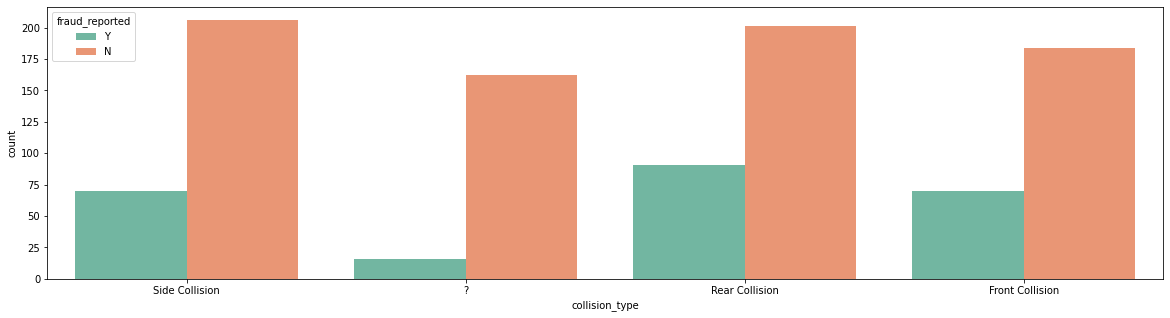

In [19]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='collision_type',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='auto_make', ylabel='count'>

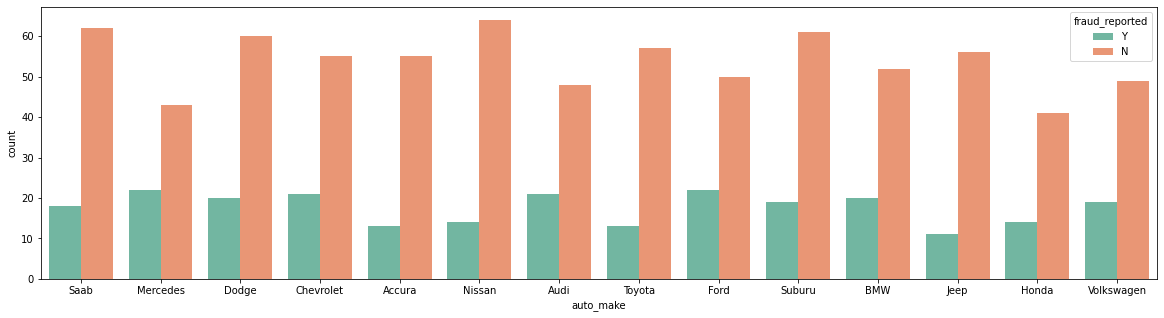

In [20]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='auto_make',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

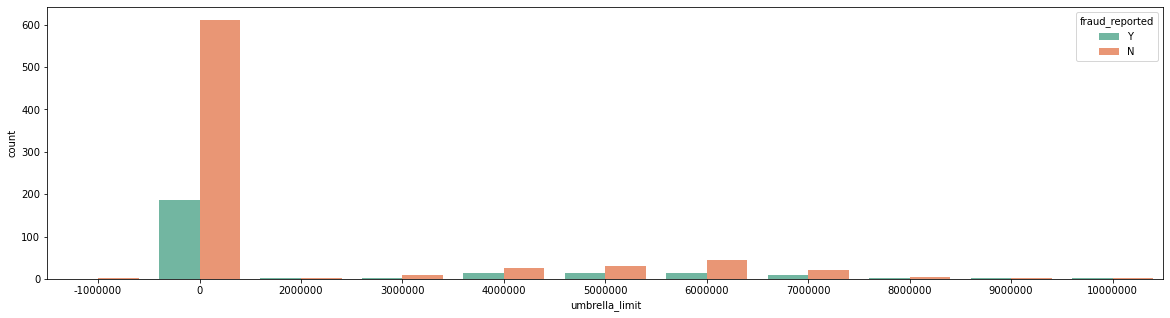

In [21]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

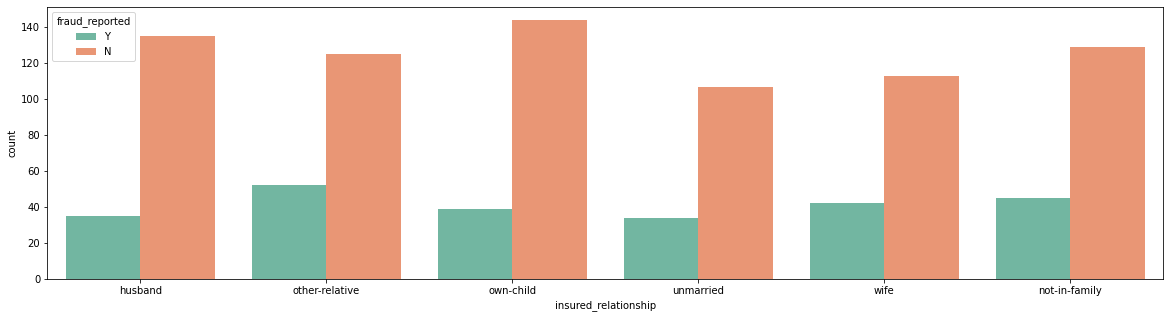

In [22]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=data,palette='Set2')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

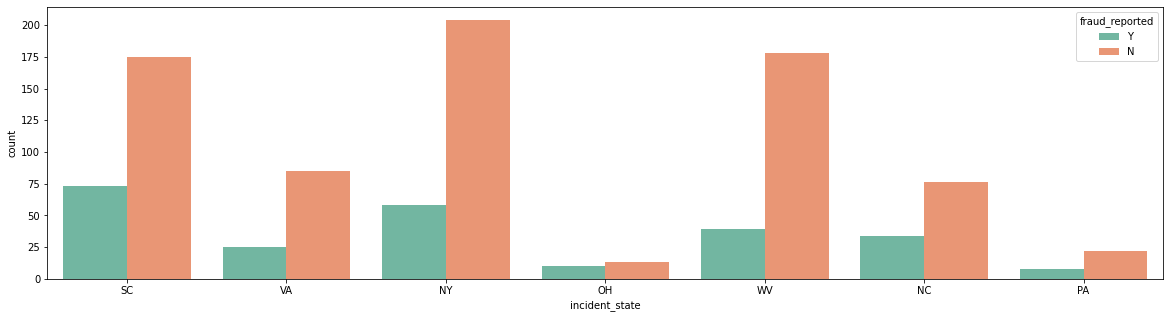

In [23]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='incident_state',hue='fraud_reported',data=data,palette='Set2')


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

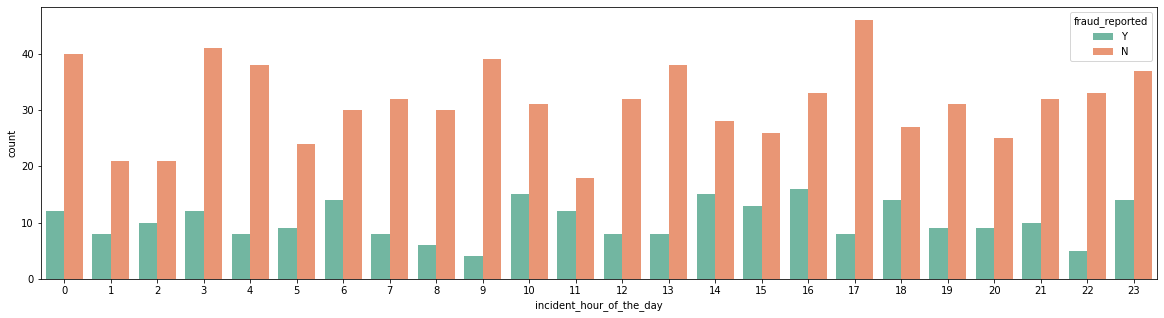

In [24]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='incident_hour_of_the_day',hue='fraud_reported',data=data,palette='Set2')